In [118]:
from sqlalchemy import create_engine
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [119]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [120]:
df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
date                   96453 non-null datetime64[ns, UTC]
summary                96453 non-null object
preciptype             96453 non-null object
temperature            96453 non-null float64
apparenttemperature    96453 non-null float64
humidity               96453 non-null float64
windspeed              96453 non-null float64
windbearing            96453 non-null float64
visibility             96453 non-null float64
loudcover              96453 non-null float64
pressure               96453 non-null float64
dailysummary           96453 non-null object
dtypes: datetime64[ns, UTC](1), float64(8), object(3)
memory usage: 8.8+ MB


In [122]:
df.rename(columns={'temperature': 'temp'}, inplace=True)

In [123]:
df.describe()

,temp,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [124]:
num_col = df.select_dtypes(['int64', 'float64']).columns
non_col = df.select_dtypes(['object']).columns

In [125]:
num_col

Index(['temp', 'apparenttemperature', 'humidity', 'windspeed', 'windbearing',
       'visibility', 'loudcover', 'pressure'],
      dtype='object')

In [126]:
non_col

Index(['summary', 'preciptype', 'dailysummary'], dtype='object')

In [127]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
dailysummary,0,0.0
pressure,0,0.0
loudcover,0,0.0
visibility,0,0.0
windbearing,0,0.0
windspeed,0,0.0
humidity,0,0.0
apparenttemperature,0,0.0
temp,0,0.0
preciptype,0,0.0


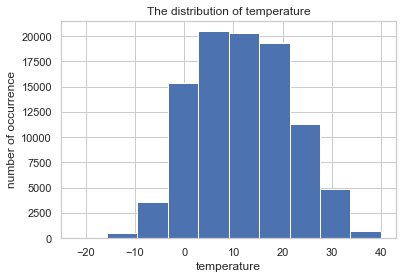

In [128]:
plt.hist(df['temp'])
plt.title("The distribution of temperature")
plt.xlabel("temperature")
plt.ylabel("number of occurrence")
plt.show()

In [129]:
df[num_col].head()

,temp,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [130]:
np.abs(df[num_col].iloc[:,0:].corr().loc[:,"temp"]).sort_values(ascending=False)

temp                   1.000000
apparenttemperature    0.992629
humidity               0.632255
visibility             0.392847
windbearing            0.029988
windspeed              0.008957
pressure               0.005447
loudcover                   NaN
Name: temp, dtype: float64

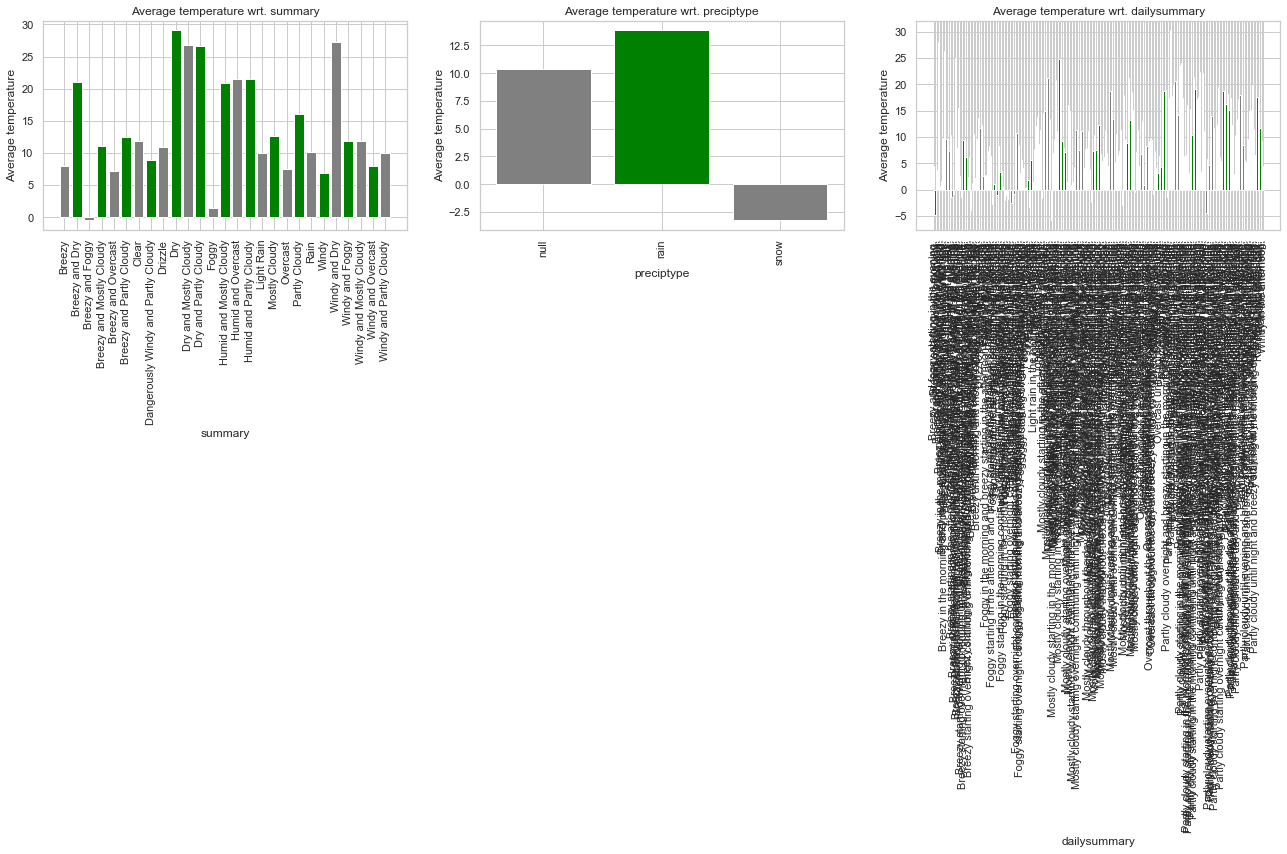

In [131]:
plt.figure(figsize=(30,50))

for index, column in enumerate(non_num):
    plt.subplot(11,4,index+1)
    plt.bar(df.groupby(column)["temp"].mean().index, df.groupby(column)["temp"].mean(),
           color=("grey","green"))
    plt.title("Average temperature wrt. {}".format(column))
    plt.ylabel("Average temperature")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [132]:
df = pd.concat([df,pd.get_dummies(df.summary, prefix="summary", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df.preciptype, prefix="precip", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(df.summary, prefix="summary", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df.preciptype, prefix="precip", drop_first=True).columns)

In [133]:
X = df[['humidity', 'visibility'] + dummy_column_names]
Y = df['temp']

In [134]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     4807.
Date:                Thu, 11 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:39:04   Log-Likelihood:            -3.1042e+05
No. Observations:               96453   AIC:                         6.209e+05
Df Residuals:                   96422   BIC:                         6.212e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          22.2992      0.870     25.638      0.000      20.594      24.004
humidity                                      -23.7239      0.115   -206.268      0.000     -23.949     -23.498
visibility                                      0.1423      0.006     23.079      0.000       0.130       0.154
summary_Breezy and Dry                          1.3229      6.103      0.217      0.828     -10.639      13.285
summary_Breezy and Foggy                        6.8703      1.314      5.230      0.000       4.296       9.445
summary_Breezy and Mostly Cloudy                0.6827      0.865      0.789      0.430      -1.013       2.378
summary_Breezy and Overcast                     0.5939      0.864      0.687      0.492      -1.100       2.288
summary_Breezy and Partly Cloudy               -0.4742      0.879     -0.540      0.589      -2.197       1.248
summary_Clear                                   4.7356      0.825      5.739      0.000       3.118       6.353
summary_Dangerously Windy and Partly Cloudy    -5.5958      6.103     -0.917      0.359     -17.558       6.366
summary_Drizzle                                 5.7545      1.271      4.527      0.000       3.263       8.246
summary_Dry                                     8.5524      1.325      6.456      0.000       5.956      11.149
summary_Dry and Mostly Cloudy                   6.6076      1.814      3.642      0.000       3.052      10.164
summary_Dry and Partly Cloudy                   6.2192      1.051      5.918      0.000       4.159       8.279
summary_Foggy                                   4.6165      0.828      5.576      0.000       2.994       6.239
summary_Humid and Mostly Cloudy                15.7060      1.262     12.446      0.000      13.233      18.179
summary_Humid and Overcast                     16.6018      2.430      6.833      0.000      11.840      21.364
summary_Humid and Partly Cloudy                15.6565      1.682      9.308      0.000      12.360      18.953
summary_Light Rain                              5.6073      1.122      4.997      0.000       3.408       7.807
summary_Mostly Cloudy                           4.5869      0.824      5.567      0.000       2.972       6.202
summary_Overcast                                3.5404      0.825      4.293      0.000       1.924       5.157
summary_Partly Cloudy                           5.8957      0.824      7.157      0.000       4.281       7.510
summary_Rain                                    7.7739      2.083      3.732      0.000       3.692      11.856
summary_Windy                                  -5.6736      2.291     -2.476      0.013     -10.164      -1.183
summary_Windy and Dry                           6.9595     

## Testing model assumptions

In [135]:
from sklearn import linear_model
import statsmodels.formula.api as smf

In [136]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -4.087132750946691e-15


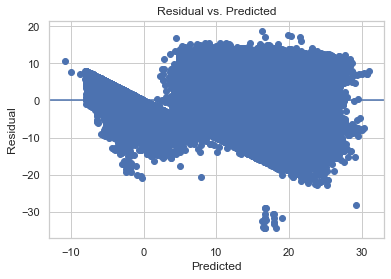

In [137]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [138]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 3879.42 and p value is 0
Levene test statistic value is 1210.18 and p value is 2.48e-264


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

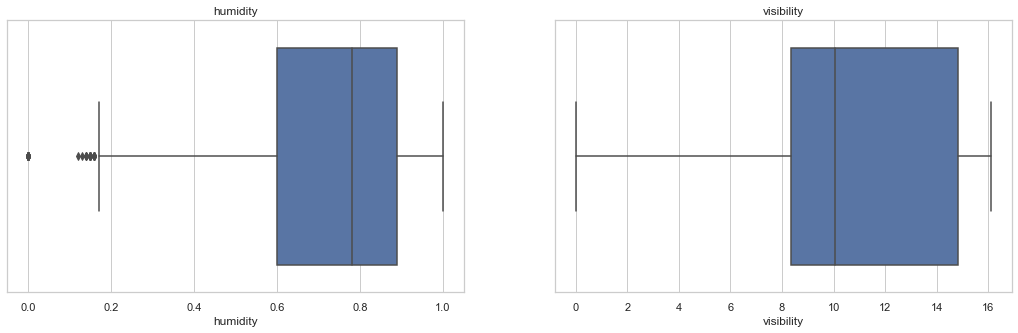

In [139]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.boxplot(x=df['humidity'])
plt.title('humidity')

plt.subplot(1,2,2)
sns.boxplot(x=df['visibility'])
plt.title('visibility')

plt.show()

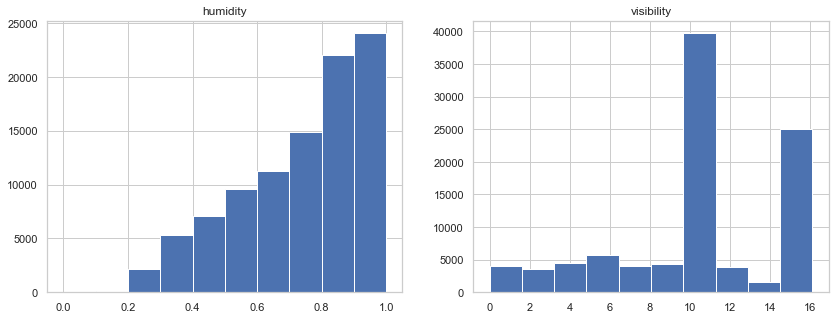

In [101]:
plt.figure(figsize=(14,5))

# histograms of the box-cox transformed data
plt.subplot(1, 2, 1)
plt.hist(df['humidity'])
plt.title("humidity")

plt.subplot(1, 2, 2)
plt.hist(df['visibility'])
plt.title("visibility")

plt.show()

In [113]:
humidity_filter = df.loc[df['humidity']== 0]

#only 22 instances where humidity = 0, so let's drop those rows

df = df[df['humidity'] != 0]

In [114]:
#test to make sure '0' rows are going
humidity_filter = df.loc[df['humidity']== 0]
humidity_filter

,date,summary,preciptype,temp,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,...,summary_Partly Cloudy,summary_Rain,summary_Windy,summary_Windy and Dry,summary_Windy and Foggy,summary_Windy and Mostly Cloudy,summary_Windy and Overcast,summary_Windy and Partly Cloudy,precip_rain,precip_snow


In [116]:
vis_filter = df.loc[df['visibility']== 0]

#only 22 instances where humidity = 0, so let's drop those rows


In [117]:
vis_filter

,date,summary,preciptype,temp,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,...,summary_Partly Cloudy,summary_Rain,summary_Windy,summary_Windy and Dry,summary_Windy and Foggy,summary_Windy and Mostly Cloudy,summary_Windy and Overcast,summary_Windy and Partly Cloudy,precip_rain,precip_snow
1640,2006-12-16 07:00:00+00:00,Foggy,snow,-2.244444,-2.244444,1.00,0.0000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1641,2006-12-16 08:00:00+00:00,Foggy,snow,-2.244444,-2.244444,1.00,3.2200,170.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1661,2006-12-17 04:00:00+00:00,Foggy,snow,-2.200000,-2.200000,1.00,3.1717,158.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1662,2006-12-17 05:00:00+00:00,Foggy,snow,-2.150000,-2.150000,1.00,3.2200,90.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1664,2006-12-17 07:00:00+00:00,Foggy,snow,-2.150000,-5.177778,1.00,7.8085,19.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1665,2006-12-17 08:00:00+00:00,Foggy,snow,-2.150000,-2.150000,1.00,4.8300,20.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2876,2006-02-09 19:00:00+00:00,Foggy,snow,-2.177778,-6.122222,1.00,10.8192,200.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
7075,2006-11-28 19:00:00+00:00,Foggy,rain,3.888889,3.888889,1.00,1.6100,20.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
7084,2006-11-29 04:00:00+00:00,Foggy,rain,2.844444,2.844444,1.00,0.0000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
11358,2007-02-23 05:00:00+00:00,Foggy,snow,-1.161111,-2.916667,0.93,5.0554,337.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [140]:
from scipy.stats import boxcox

humidity_boxcox,_ = boxcox(df["humidity"])
visibility_boxcox,_ = boxcox(df["visibility"])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(2, 2, 1)
plt.hist(df['humidity'])
plt.title("humidity")

plt.subplot(2, 2, 2)
plt.hist(humidity_boxcox)
plt.title("humidity (box-cox transformed)")

plt.subplot(2, 2, 3)
plt.hist(df['visibility'])
plt.title("visibility")

plt.subplot(2, 2, 4)
plt.hist(visibility_boxcox)
plt.title("visibility (box-cox transformed)")

plt.show()

ValueError: Data must be positive.

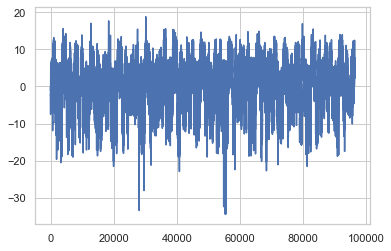

In [141]:
plt.plot(errors)
plt.show()

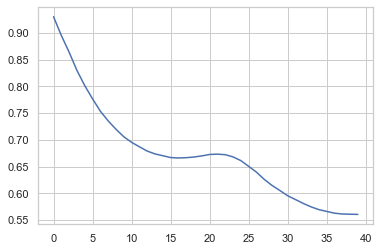

In [142]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)
plt.plot(acf_data[1:])
plt.show()

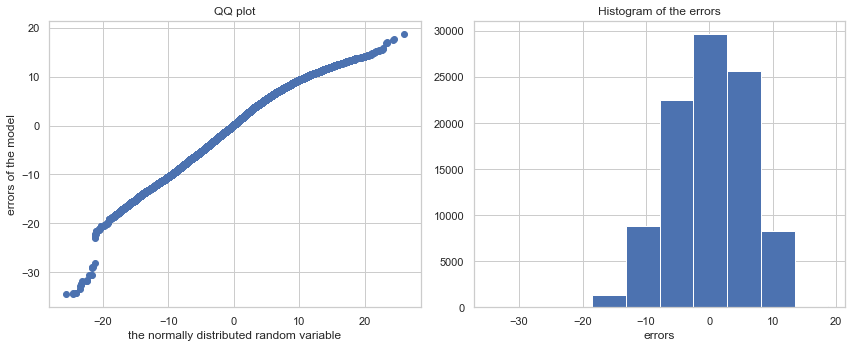

In [143]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [144]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1448.4023830497151 and p value is 0.0
Normality test statistics is 1606.7843020376495 and p value is 0.0
